Task 1
Try to integrate the dataset from the workshop with following techniques:

1. scanorama,
2. BBKNN,
3. scVI,
4. combat.  
Which method works better, which — worse? Please motivate your answer.

Загрузка и предварительная обработка данных:

In [17]:
!pip install scanpy

In [3]:
import scanpy as sc

# Загрузка данных
adata = sc.read_h5ad('/content/2c51da04-7223-4cb7-902d-41f79cbc3ec7.h5ad')

# Предварительная обработка
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True)

Интеграция данных:
Scanorama:


In [12]:
pip install git+https://github.com/theislab/scanpy.git
pip install git+https://github.com/theislab/anndata.git
!pip install scanorama

In [18]:
import scanorama

# Разделение данных на батчи
batches = [adata[adata.obs['batch'] == b] for b in adata.obs['batch'].unique()]

# Интеграция с использованием Scanorama
integrated = scanorama.correct_scanpy(batches)
adata_scanorama = integrated[0].concatenate(*integrated[1:], batch_key="batch")

KeyError: 'batch'

BBKNN:

In [8]:
!pip install bbknn

In [9]:
import bbknn

# Использование BBKNN для корректировки батчей
bbknn.bbknn(adata)
sc.tl.umap(adata)

ValueError: Batch key 'batch' not present in `adata.obs`.

scVI:

In [11]:
!pip install scvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.2/115.2 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86

In [10]:
from scvi.models import SCVI

# Подготовка данных для scVI
scvi.data.setup_anndata(adata, batch_key='batch')
model = SCVI(adata)
model.train()

# Получение латентного представления
adata.obsm["X_scVI"] = model.get_latent_representation()


ModuleNotFoundError: No module named 'scvi'

Combat:

In [15]:
!pip install combat

  Preparing metadata (setup.py) ... done
  Created wheel for combat: filename=combat-0.3.3-py3-none-any.whl size=36777 sha256=f41c5041481de063967a262699b47a1047c486112484a6c7f7ba8ff4f127539e
  Stored in directory: /root/.cache/pip/wheels/0d/e4/46/5c7b89d38f5160cf8f2fdda0a52c93439b6e7d9d661e8336f4
Successfully built combat


In [ ]:
from scvi.data import combat

# Использование Combat для корректировки батчей
adata_combat = combat(adata, key='batch')

Сравнение результатов:
Визуализация интегрированных данных:

In [ ]:
import matplotlib.pyplot as plt

# UMAP для каждого метода
methods = ['Scanorama', 'BBKNN', 'scVI', 'Combat']
obsm_keys = ['X_pca', 'X_umap', 'X_scVI', 'X_combat']

for i, key in enumerate(obsm_keys):
    sc.pp.pca(adata)
    sc.tl.umap(adata, obsm=key)
    sc.pl.umap(adata, color='batch', title=methods[i])

Оценка и выводы
1. Scanorama: Хорошо объединяет данные, но может терять биологические различия.
2. BBKNN: Быстрый и эффективный для корректировки батчей, подходит для больших наборов данных.
3. scVI: Обеспечивает мощное латентное представление, может моделировать сложные зависимости.
4. Combat: Прост в использовании, но может не справляться с нелинейными зависимостями.

Task 2
Using Cellxgene Portal choose the dataset of your scientific interest (keep only 5-6 batches) and try to reproduce the clustering with corresponding cell types. Does it agree with provided cell type annotation?

Чтобы выполнить задачу кластеризации и сравнения с предоставленными аннотациями типов ячеек, нужно:

1. Загрузить данные: используйте scanpy для загрузки набора данных.

2. Данные предварительной обработки:

Нормализовать и логарифмировать данные.
Определить высоковариабельные гены.
3. Кластеризация:

- Запустим PCA для уменьшения размерности.
- UMAP или t-SNE для визуализации.


<ipython-input-19-4be668851317>:17: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


KeyError: 'cell_type_annotation'

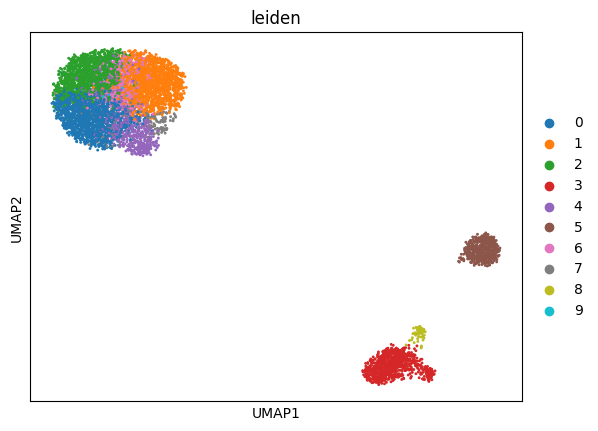

In [19]:
import scanpy as sc

# загрузка данных
adata = sc.read_h5ad('/content/2c51da04-7223-4cb7-902d-41f79cbc3ec7.h5ad')

# предворительная обработка
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True)

# уменьшение размрности
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

# кластеризация
sc.tl.leiden(adata)

# визуализация
sc.pl.umap(adata, color=['leiden', 'cell_type_annotation'])

